# MONEYBALL - O Homem que Mudou o Jogo:

## Contexto:
Um dos times mais pobres no Baseball na época, com o salário 4 vezes menor em comparação com os times ricos.

Tiveram o Budget cortado em 1995, mas ainda conseguiam ganhar jogos e indo para os playoffs.

O Oakland A´s fizeram então uma abordagem quantitiva para encontraram jogadores desvalorizados e assim montaram um time eficiente com baixo investimento.

Com uma abordagem diferente, Oakland A's selecionou jogadores com base nas estatísticas, não no modo de jogar.


## Problema de Negócio:
Descobrir como chegar os Playoffs, utilizando esse DataSet com informações que foram usadas pelo Oakland A´s, e nisso entenderemos quais foram os métodos utilizados pelo time na época.

Fonte dos Dados: https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012

### Instalando e carregando pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregar os dados usando pandas
dados = pd.read_csv('dados/baseball.csv')

### Usando Dados de 1962-2001 para poder Prever a Temporada de 2002 da MLB

In [3]:
moneyball = dados.loc[dados['Year'] < 2002]

In [4]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


In [5]:
moneyball['Playoffs'].value_counts()

0    748
1    154
Name: Playoffs, dtype: int64

### Relação entre Números de Vitórias e Playoffs

In [6]:
qualificados = moneyball[['Team', 'W', 'Playoffs']]

tabela_pivo = pd.pivot_table(qualificados, index='Team', columns='Playoffs', values='W', aggfunc='mean')

tabela_pivo[1].head()

Team
ANA          NaN
ARI    96.000000
ATL    97.000000
BAL    98.900000
BOS    92.142857
Name: 1, dtype: float64

In [52]:
W = round(tabela_pivo[1].mean())
print("A média de vitórias dos times que vão para os playoffs é de", W ,"vitórias")

A média de vitórias dos times que vão para os playoffs é de 95 vitórias


<Figure size 1440x576 with 0 Axes>

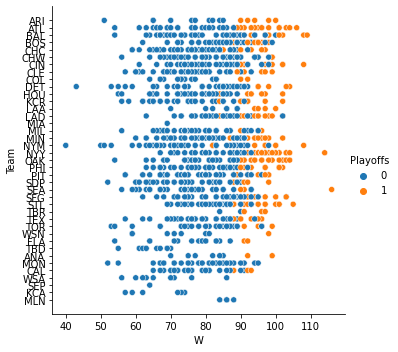

In [8]:
plt.figure(figsize = (20,8))
sns.relplot(x = "W", y = "Team", hue = "Playoffs", data = dados)

### Inserindo a Coluna de RD no Dataset:

RD - Valor da diferença entre RS e RA.

RS - Corridas que foram marcadas 

RA - Corridas que foram permitidas


In [9]:
RD = moneyball['RS'] - moneyball['RA']

In [10]:
# Inserindo a coluna de RD no Dataset
moneyball.insert(loc = 5, column = 'RD', value = RD)

In [11]:
moneyball.head()

,Team,League,Year,RS,RA,RD,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
330,ANA,AL,2001,691,730,-39,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
331,ARI,NL,2001,818,677,141,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
332,ATL,NL,2001,729,643,86,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
333,BAL,AL,2001,687,829,-142,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
334,BOS,AL,2001,772,745,27,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


### Relação entre Vitórias (W) e Valor da diferença entre 'runs' marcadas e permitadas (RD)

In [24]:
X = moneyball['RD']  # Variável independente
y = moneyball['W']   # Variável dependente

X = sm.add_constant(X)  # Adicionar uma coluna de 1s para representar o termo constante

regressao = sm.OLS(y, X).fit()  # Ajustar o modelo de regressão
print(regressao.summary()) # Imprimir os resultados da regressão

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:00:10   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8814      0.131    616.675      0.0

In [22]:
print("R-quadrado:", round(regressao.rsquared,2),", Temos uma Regressão Linear entre as duas variáveis (W~RD).")

R-quadrado: 0.88 , Temos uma Regressão Linear entre as duas variáveis (W~RD).


In [23]:
W = 95
W = 80.8814 + 0.1058*RD
RD = (95- 80.8814)/0.1058
print('Valor de RD é:', round(RD))

Valor de RD é: 133


### RS: Corridas  marcadas

OBP e SLG são os atributos mais importantes para prever as corridas('runs') marcadas. 

OBP - (tempo que o jogador chega na base)A porcentagem de bases alcançadas, mede a habilidade do rebatedor de chegar à base com segurança.

SLG - (tempo que o jogador da volta na base)A porcentagem de bases extras alcançadas (SLG) mede a habilidade do rebatedor de produzir bases extras, como rebatidas de dupla, tripla e home runs.

In [25]:
X1 = moneyball[['OBP', 'SLG']]  # Variáveis independentes
y1 = moneyball['RS']   # Variável dependente

X1 = sm.add_constant(X1)  # Adicionar uma coluna de 1s para representar o termo constante

regressao1 = sm.OLS(y1, X1).fit()  # Ajustar o modelo de regressão
print(regressao1.summary()) # Imprimir os resultados da regressão

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:02:46   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -804.6271     18.921    -42.526      0.0

In [54]:
print("R-quadrado:", round(regressao1.rsquared,2),", Temos uma Regressão Linear forte entre as três variáveis (RS~OBP+SLG).")

R-quadrado: 0.93 , Temos uma Regressão Linear forte entre as três variáveis (RS~OBP+SLG).


In [29]:
obp = moneyball[moneyball.Year == 2001][moneyball.Team == 'OAK'][['Team','OBP','SLG']]
obp

,Team,OBP,SLG
350,OAK,0.345,0.439


In [55]:
RS = -804.6271 +  2737.7680 *0.345 + 1584.9086*0.439
print("O time deve marcar próximo de", round(RS), 'corridas(runs)')

O time deve marcar próximo de 836 corridas(runs)


###  RA:  Corridas permitidas
OOBP e OSLG são estatísticas importantes para avaliar a qualidade do desempenho da equipe em termos de defesa e arremessadores, fornecendo uma visão geral da habilidade da equipe em evitar que os adversários alcancem as bases e pontuem corridas.

OOBP - representa a porcentagem de vezes que um adversário alcança uma base, em relação ao número total de oportunidades de chegar à base. 

OSLG -  mede a média de bases alcançadas pelos adversários por rebatida válida

In [42]:
regressao2 = smf.ols(formula='RA~OOBP+OSLG', data=moneyball).fit()
regressao2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RA   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.16e-45
Time:                        22:27:29   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -837.3779     60.255    -13.897      0.000    -957.142    -717.614
OOBP        2913.5995    291.971      9.979      0.000    2333.276    3493.923
OSLG        1514.2860    175.428      8.632      0.000    1165.604    1862.968
==============================================================================
Omnibus:                        3.836   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.104
Skew:                          -0.392   Prob(JB):                        0.212
Kurtosis:                       3.461   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print("R-quadrado:", round(regressao2.rsquared,2),", Temos uma Regressão Linear forte entre as três variáveis (RA~OOBP+OSLG).")

R-quadrado: 0.91 , Temos uma Regressão Linear forte entre as três variáveis (RA~OOBP+OSLG).


In [43]:
oobp = moneyball[moneyball.Year == 2001][moneyball.Team == 'OAK'][['Team','OOBP','OSLG']]
oobp

,Team,OOBP,OSLG
350,OAK,0.308,0.38


In [44]:
RA = -837.3779 + 2913.5995*0.308 + 1514.2860*0.38

In [46]:
print("O time pode permitir receber",round(RA), "runs")

O time pode permitir receber 635 runs


### Calculando a quantidade de vitórias necessárias para o time chegar aos Playoffs

In [47]:
W2 = 80.8814 + 0.1058*(RS-RA)

In [51]:
print('Serão necessárias',round(W2) , 'vitórias')

Serão necessárias 102 vitórias


### CONCLUSÃO: 
A quantidade de vitórias que serão necessárias para ir aos Playoffs que é de 102 vitórias, então os valores de RS e RA estão coerrentes pois o valor está muito próximo da média de vitórias dos times que foram qualificados para os Playoffs.